In [1]:
import os
print("OS Type: ",os.name)

OS Type:  posix


In [2]:
import sys
print("OS Name: ",sys.platform)

OS Name:  darwin


In [3]:
import platform
print("OS Platform: ",platform.platform())

OS Platform:  macOS-14.1.1-x86_64-i386-64bit


In [4]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print("Number of cores are : ",numberOfCores)

Number of cores are :  8


In [5]:
import threading
activeThread = threading.active_count()
print("Number of active threads are : ",activeThread)

Number of active threads are :  8


In [6]:
import numpy as np
import threading
import time

In [7]:
def generate_matrices(num,size):
    matrices =[]
    for _ in range(num):
        matrices.append(np.random.rand(size,size))
    return matrices

In [8]:
def multiply_matrices(constant_matrix, matrices, result, index):
    result[index] = np.dot(constant_matrix, matrices[index])

In [9]:
num_matrices = 100
matrix_size = 1000
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [10]:
constant_matrix

array([[0.95835858, 0.64397482, 0.89196625, ..., 0.49078847, 0.88199149,
        0.30733368],
       [0.75170103, 0.46192747, 0.94273778, ..., 0.16567389, 0.08930371,
        0.75511634],
       [0.24127264, 0.86343703, 0.51579781, ..., 0.17185842, 0.62702044,
        0.12273084],
       ...,
       [0.31611726, 0.40647227, 0.9585991 , ..., 0.16220974, 0.09750937,
        0.55320744],
       [0.56660549, 0.54904395, 0.6800545 , ..., 0.7512686 , 0.04660374,
        0.96124954],
       [0.66414477, 0.70916596, 0.92434042, ..., 0.73184982, 0.50645721,
        0.66289235]])

In [11]:
time_arr=[None]*15

In [12]:
time_arr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
matrices = generate_matrices(num_matrices, matrix_size)
result = [None] * num_matrices
activeThreads=0
for num_threads in range(1, 16):
    start_time = time.time()
    threads = []
    activeThreads = threading.active_count()
    print(f"Multiplication with {num_threads} threads:")
    for i in range(num_matrices):
        thread = threading.Thread(target=multiply_matrices, args=(constant_matrix, matrices, result, i))
        threads.append(thread)
        thread.start()
        while True:
            if threading.active_count() - activeThreads + 1 <= num_threads:
                break
            time.sleep(1)
    while True:
        if threading.active_count() == activeThreads:
            break
        else:
            print ("    Thread still running (left %d)..."%(threading.active_count() - activeThreads))
            time.sleep(1)

    print(" All Thread ends")

    print("Program Finished")
    print("Total Time %f sec" % (round( time.time() - start_time,4)))
    time_arr[num_threads-1]=(round( time.time() - start_time,4))

Multiplication with 1 threads:
 All Thread ends
Program Finished
Total Time 101.001200 sec
Multiplication with 2 threads:
 All Thread ends
Program Finished
Total Time 51.511800 sec
Multiplication with 3 threads:
    Thread still running (left 1)...
 All Thread ends
Program Finished
Total Time 35.265500 sec
Multiplication with 4 threads:
    Thread still running (left 2)...
 All Thread ends
Program Finished
Total Time 26.230100 sec
Multiplication with 5 threads:
    Thread still running (left 3)...
 All Thread ends
Program Finished
Total Time 21.176200 sec
Multiplication with 6 threads:
    Thread still running (left 4)...
 All Thread ends
Program Finished
Total Time 18.129200 sec
Multiplication with 7 threads:
    Thread still running (left 2)...
 All Thread ends
Program Finished
Total Time 15.940900 sec
Multiplication with 8 threads:
    Thread still running (left 4)...
 All Thread ends
Program Finished
Total Time 13.933400 sec
Multiplication with 9 threads:
    Thread still running (

In [14]:
time_arr

[101.0022,
 51.512,
 35.2656,
 26.2305,
 21.1764,
 18.1294,
 15.9409,
 13.9336,
 12.9013,
 10.9412,
 10.6683,
 9.7027,
 9.8232,
 11.934,
 10.9542]

In [15]:
import matplotlib.pyplot as plt

In [16]:
num_threads = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]

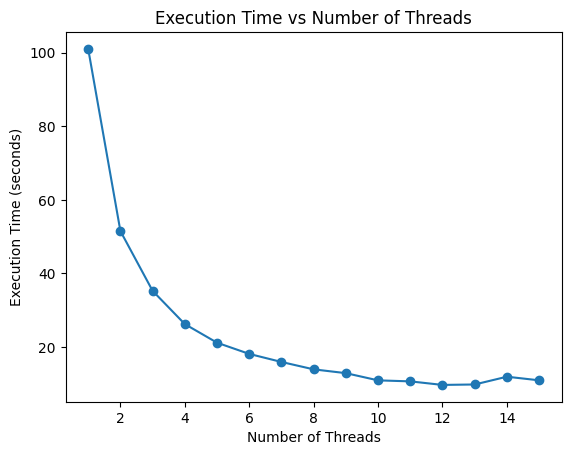

In [17]:
plt.plot(num_threads, time_arr,marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Threads')

plt.show()